In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Question No.1.A:

In [2]:
cust_data = pd.read_csv('olist_customers_dataset.csv')
geo_data =  pd.read_csv('olist_geolocation_dataset.csv')
order_items =  pd.read_csv('olist_order_items_dataset.csv')
order_payments =  pd.read_csv('olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('olist_orders_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')
sellers_data = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

Question No.1.B:

In [3]:
print(cust_data.columns)
print(geo_data.columns)
print(order_items.columns)
print(order_payments.columns)
print(order_reviews.columns)
print(order_data.columns)
print(products_data.columns)
print(sellers_data.columns)
print(product_category.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['product_id', 'prod

Question No.1.C:

In [4]:
file_name ={'orders':'olist_orders_dataset', 'order_items':'olist_order_items_dataset',
             'products':'olist_products_dataset', 'eng_product_cate':'product_category_name_translation',
             'customers': 'olist_customers_dataset','sellers': 'olist_sellers_dataset',
             'payments':'olist_order_payments_dataset', 'reviews':'olist_order_reviews_dataset', 
             'geolocation':'olist_geolocation_dataset'}
for name in file_name.keys(): 
    locals()[name] = pd.read_csv('C:/Users/hemanta.saikia/Downloads/olist_products_dataset (2)/'+file_name[name]+'.csv')
dataset_name = file_name.keys()
df_columns_name= pd.DataFrame([globals()[i].columns for i in dataset_name], index = dataset_name).T

In [5]:
df_columns_name

orders          order_items  \
0                       order_id             order_id   
1                    customer_id        order_item_id   
2                   order_status           product_id   
3       order_purchase_timestamp            seller_id   
4              order_approved_at  shipping_limit_date   
5   order_delivered_carrier_date                price   
6  order_delivered_customer_date        freight_value   
7  order_estimated_delivery_date                 None   
8                           None                 None   

                     products               eng_product_cate  \
0                  product_id          product_category_name   
1       product_category_name  product_category_name_english   
2         product_name_lenght                           None   
3  product_description_lenght                           None   
4          product_photos_qty                           None   
5            product_weight_g                           None   
6           product_length_cm                           None   
7           product_height_cm                           None   
8            product_width_cm                           None   

                  customers                 sellers              payments  \
0               customer_id               seller_id              order_id   
1        customer_unique_id  seller_zip_code_prefix    payment_sequential   
2  customer_zip_code_prefix             seller_city          payment_type   
3             customer_city            seller_state  payment_installments   
4            customer_state                    None         payment_value   
5                      None                    None                  None   
6                      None                    None                  None   
7                      None                    None                  None   
8                      None                    None                  None   

                   reviews                  geolocation  
0                review_id  geolocation_zip_code_prefix  
1                 order_id              geolocation_lat  
2             review_score              geolocation_lng  
3     review_comment_title             geolocation_city  
4   review_comment_message            geolocation_state  
5     review_creation_date                         None  
6  review_answer_timestamp                         None  
7                     None                         None  
8                     None                         None

In [6]:
products_data.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

In [7]:
geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [8]:
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

Question No.1.D:

In [9]:
A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(103677, 26)

In [10]:
B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

Question No.1.E:

The following 'data' dataframe is the required answer. 

In [11]:
data = pd.merge(A,B,on='order_id')
data.shape

(115609, 48)

In [12]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

Question No.2.A.a:

Let's look at the missing values in different columns.

In [13]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
zip_code_prefix_x                     0
customer_city                         0
customer_state                        0
geolocation_lat_x                   310
geolocation_lng_x                   310
geolocation_city_x                  310


In [14]:
print(data.shape[0])
data[data['order_status'] != 'delivered'].shape[0]

115609


2399

In [15]:
100 - round((2399/115609)*100,3)

97.925

Observations

There are many features having null/blank entires too , but their proportion is less than 30%, so we can simply remove all such rows.

Moreover, we have the product category name in a different language, so we simply rename the english version of the category names to category_name and delete the other.

To add on to this , we can clearly remove very detailed information about the product i.e product_description_lenght, product_name_lenght, product_weight_g, product_length_cm, product_height_cm, product_width_cm as they dont decide wheather a customer will like it or not.

Only feature in product section that can be useful is number of photos the product has, if it has many photos customer customer is well aware of how the product looks from all possible ways and is more certainly sure about going for it , thus increasing the chance of getting a positive rating.

On a similar note , product_description lenght can also act somewhat useful, because if the description of the product is detailed and long , customer is most likely to know evrey crux of the product thus increasing the high rating probability.

We dont clearly need latitudinal and longtuditnal info, seller_city(seller state is enough)

Order_approved_at is a datetime based feature which is useless, because customer is least intersted when the order was approved, because in almost all case it gets approved instantly or within some minutes or hours. It is a trivial feature.

As we have already removed product reviews and review titles , there is no use of review id now.

As we have merged all the tables into a single one, so the there is no need some primary key or id. So all id can dropped except the customer unique id which may be useful to study the customer as not all the customers are same and seller_id and product_id


For numerical data we will use median value to fill the null values as they donot affect the overall distribution. For that we are using the median() function to calculate median of each column and then placing it in the null values with the fillna() function.

For the datetime values, applying logical thinking, we will fill the order_approve_at column values with corresponding order_purchase_timestamp and order_delivered_customer_date with order_estimated_delivery_date. We will drop the other column values as they cannot be guessed properly.

For object data we will use fillna() with placing no_comment in the null values.

In [16]:

data['product_weight_g'].fillna(data['product_weight_g'].median(), inplace=True)
data['product_height_cm'].fillna(data['product_height_cm'].median(), inplace=True)
data['product_length_cm'].fillna(data['product_length_cm'].median(), inplace=True)
data['product_width_cm'].fillna(data['product_width_cm'].median(), inplace=True)

index= (data[data['order_delivered_customer_date'].isnull()==True].index.values)

data["order_approved_at"].fillna(data["order_purchase_timestamp"], inplace=True)
data["order_delivered_customer_date"].fillna(data["order_estimated_delivery_date"], inplace=True)

data['review_comment_message'].fillna('no_comment', inplace=True)
data['review_comment_title'].fillna('no_comment', inplace=True)

Rest of the missing values we donot have to deal with as the whole column will be dropped down the line since they are more or less useless for the desired result.

Question No.3.A.(1st part):

We are dropping most of the useless features right now to simplify the model. We will drop columns later again.

In [17]:
data = data[data['geolocation_state_y'] == data['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)

Number of useless features as of now are :  23


Question No.2.A.b:

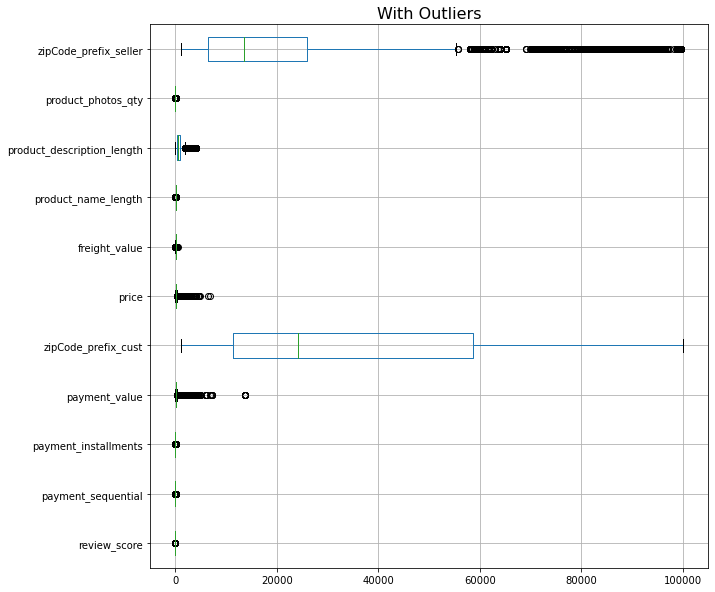

In [18]:
cont=data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in data[cont].drop('review_score',axis=1).columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

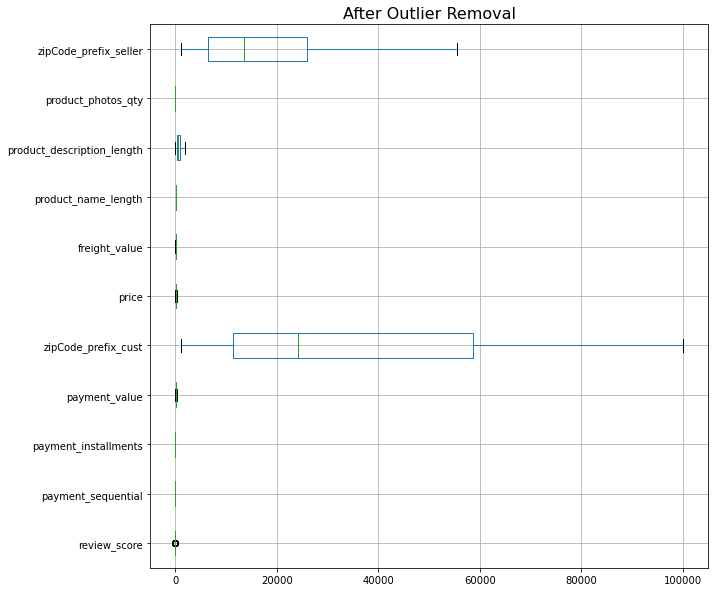

In [21]:
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [22]:
print(data.shape)
print(data.columns)

(114681, 25)
Index(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_score', 'review_comment_message', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'zipCode_prefix_cust', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty',
       'zipCode_prefix_seller', 'seller_state', 'product_category_name'],
      dtype='object')


In [23]:
data.describe().round(0)

review_score  payment_sequential  payment_installments  payment_value  \
count      114681.0            114681.0              114681.0       114681.0   
mean            4.0                 1.0                   3.0          141.0   
std             1.0                 0.0                   2.0          106.0   
min             1.0                 1.0                   0.0            0.0   
25%             4.0                 1.0                   1.0           61.0   
50%             5.0                 1.0                   2.0          108.0   
75%             5.0                 1.0                   4.0          190.0   
max             5.0                 1.0                   8.0          384.0   

       zipCode_prefix_cust     price  freight_value  product_name_length  \
count             114681.0  114681.0       114681.0             114681.0   
mean               35043.0      98.0           18.0                 49.0   
std                29840.0      76.0            7.0                 10.0   
min                 1003.0       1.0            1.0                 20.0   
25%                11250.0      40.0           13.0                 42.0   
50%                24240.0      75.0           16.0                 52.0   
75%                58704.0     135.0           21.0                 57.0   
max                99980.0     277.0           33.0                 76.0   

       product_description_length  product_photos_qty  zipCode_prefix_seller  
count                    114681.0            114681.0               114681.0  
mean                        740.0                 2.0                19786.0  
std                         512.0                 2.0                17708.0  
min                           4.0                 1.0                 1001.0  
25%                         346.0                 1.0                 6429.0  
50%                         600.0                 1.0                13568.0  
75%                         985.0                 3.0                26020.0  
max                        1944.0                 6.0                55406.0

Question No.2.A.c:

Since customer review is heavily dependent on time taken from order to delivery, we are creating various features regarding that.

In [24]:
from datetime import datetime

In [25]:
data[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
      'shipping_limit_date']]=data[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']].apply(pd.to_datetime)
data['delivery_days']=((data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.total_seconds() / 60 / 60 / 24).round(0)
data['estimated_days']=((data['order_estimated_delivery_date'] - data['order_purchase_timestamp']).dt.total_seconds() / 60 / 60 / 24).round(0)
data['ships_in']=((data['shipping_limit_date'] - data['order_purchase_timestamp']).dt.total_seconds() / 60 / 60 / 24).round(0)

In [26]:
data['purchase_delivery_diff_per_price'] = data['delivery_days']/data['price']

Question No.2.B & C:

we are doing both UNIVARIATE and BIVARIATE analysis together to get better insights

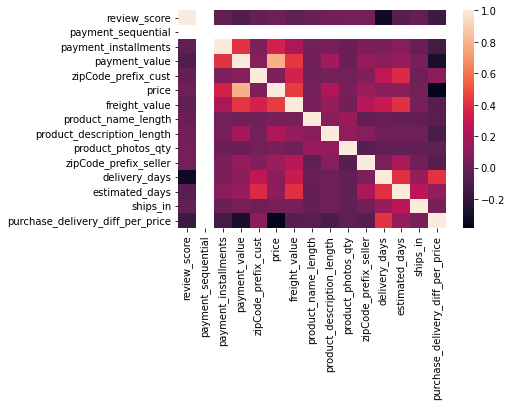

In [27]:
sns.heatmap(data.corr())
plt.show()

Exploratory Data Analysis

Month wise sales

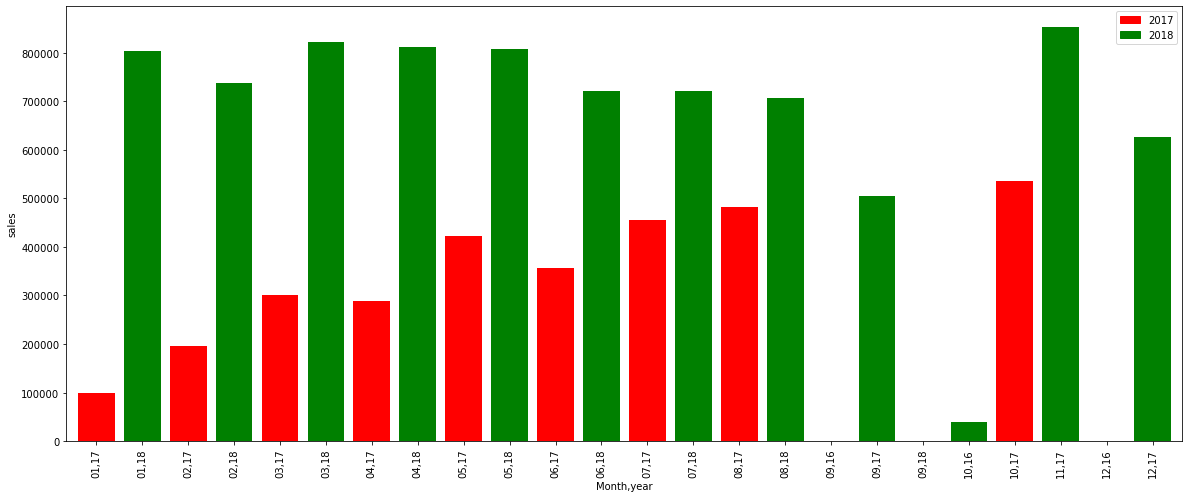

In [28]:
import matplotlib.patches as mpatches
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
monthly_sales_data = data.groupby(data['order_purchase_timestamp'].dt.strftime('%m,%y'))['price'].sum().plot(kind='bar',figsize = (20,8),color=['r','g'],width=0.8)
plt.ylabel('sales')

red_patch = mpatches.Patch(color='red', label='2017')
green_patch = mpatches.Patch(color='green', label='2018')
plt.legend(handles=[red_patch,green_patch])
plt.xlabel('Month,year')
plt.show()

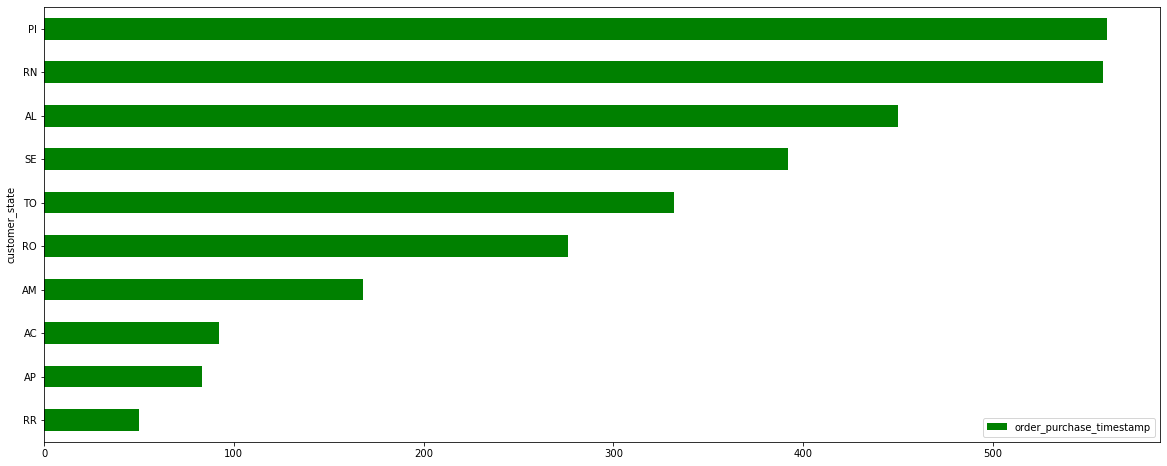

In [29]:
data.groupby(data['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='green')
plt.legend()
plt.show()

In [30]:
print('Total unique category are ',data.product_category_name.unique().shape[0])

Total unique category are  71


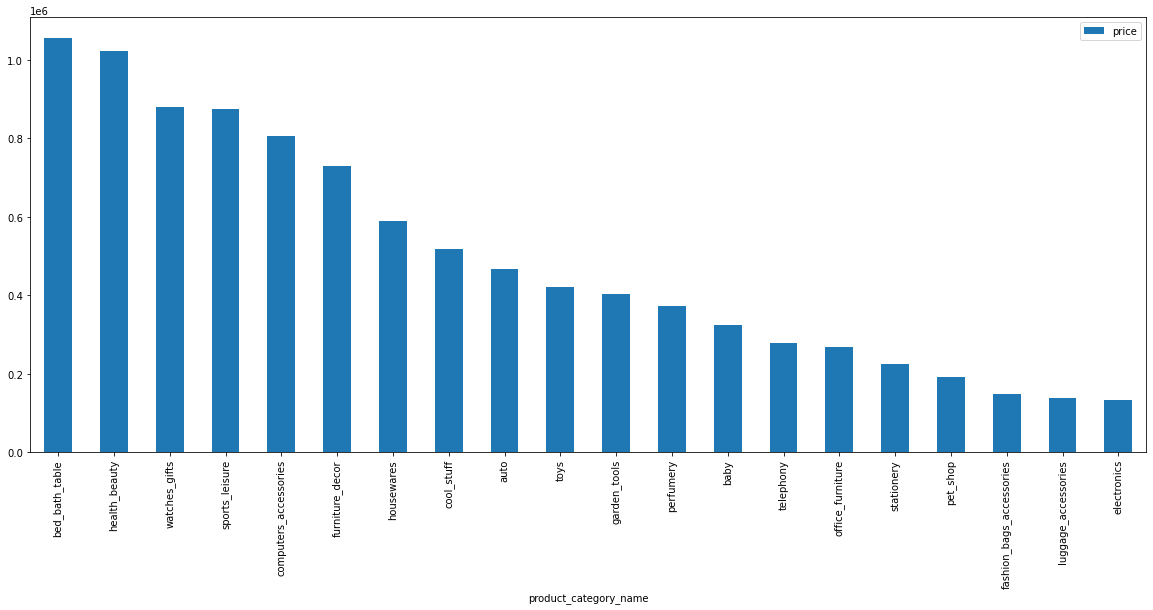

In [31]:
data.groupby(data['product_category_name'])['price'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

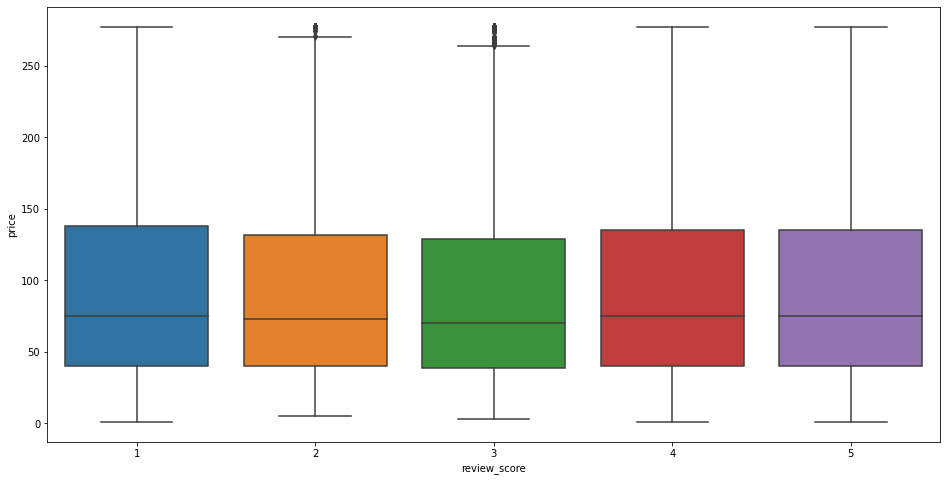

In [32]:
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.show()

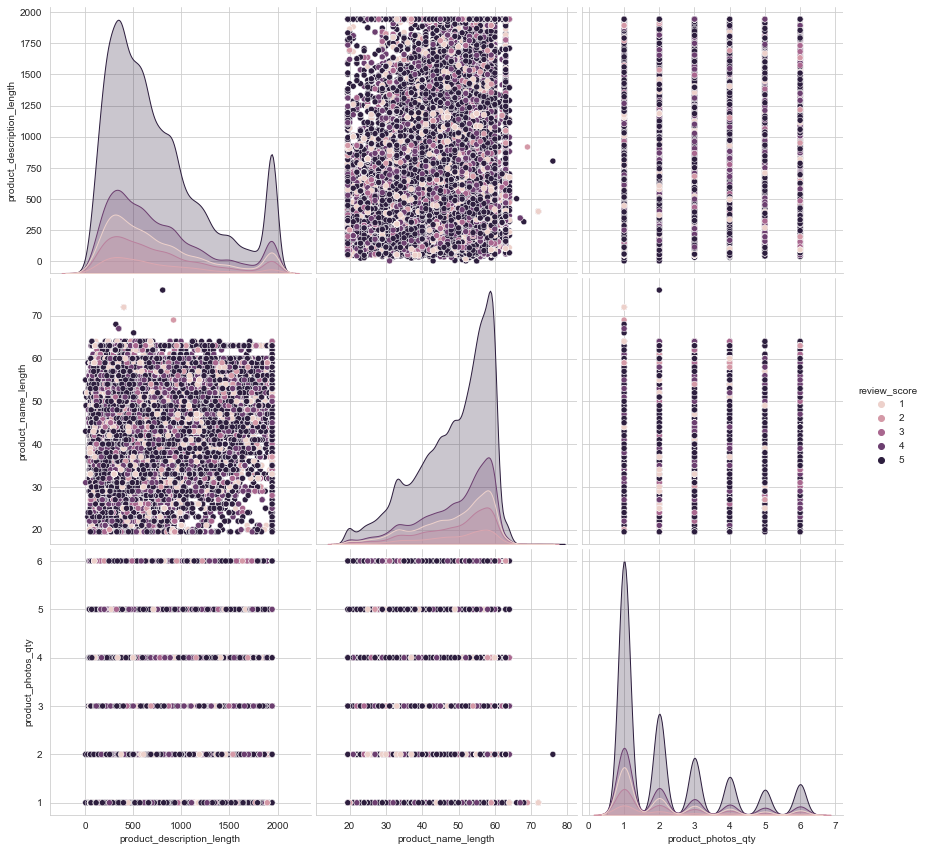

In [33]:
d = data[['product_description_length','product_name_length','product_photos_qty','review_score']]
sns.set_style("whitegrid");
sns.pairplot(d, hue="review_score", height=4);
plt.show()

Observations

Data is severly immbalaced, so scatter plot is able to separate the classes based on the selected feature

Point in the range (0-1500) product_description_length and product_name_length in range(30-60) have high frequency of 5 rated review.

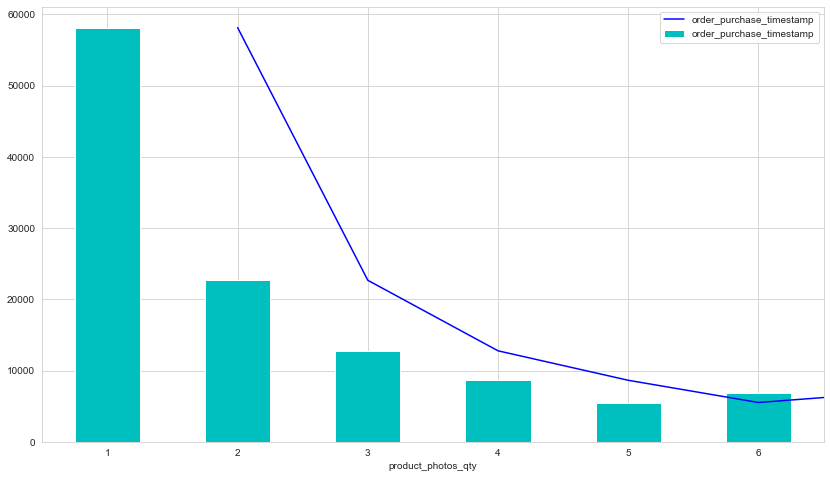

In [34]:
d = data.groupby(data['product_photos_qty'].astype(int))['order_purchase_timestamp'].count()
d.plot(kind='bar',figsize=(14,8),color='c')
d.plot(kind='line',figsize=(14,8),color='b')
plt.legend()
plt.show()

Observations

Density plots for the product name length shows that density around is very high around (40-60) range.
Number of orders w.r.t number of photos qty starts to decrease with increasing in number of photos which is not very obvious. This may be because of other feature like product_description length or name length.
Box plot

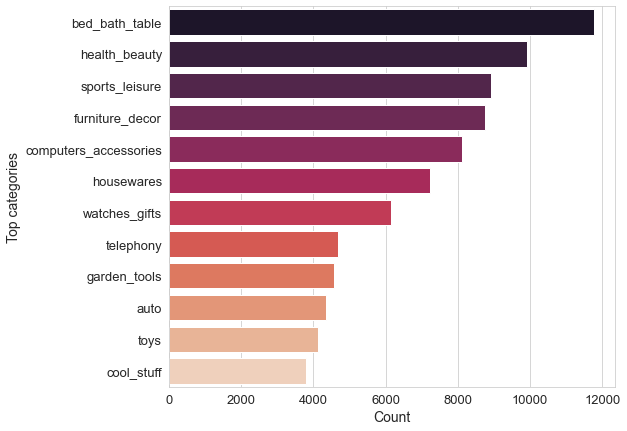

In [35]:
plt.figure(figsize=(8,7))
idx = data['product_category_name'].value_counts()[:12].index
sns.countplot(y=data['product_category_name'], order=idx, palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

We are now finding the top 12 most popular product categories in terms of the frequency of purchase. THe category 'bed bath table' significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. The category in the 12th position - 'garden tools' only had around 3500 units sold.

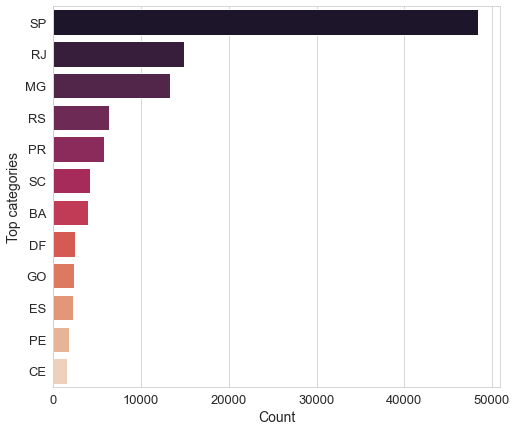

In [36]:
plt.figure(figsize=(8,7))
idx = data['customer_state'].value_counts()[:12].index
sns.countplot(y=data['customer_state'], order=idx, palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

Sao Paulo, also shortened to 'SP' is by leaps and bounds the state with the highest customer base for this firm. It might be dur to the fact that this company's headquarters is set up in Sao Paulo and more customers were informed about this website due to their heavy marketing strategy around that area. More than 40000 units were sold in Sao Paulo between 2016 and 2018.

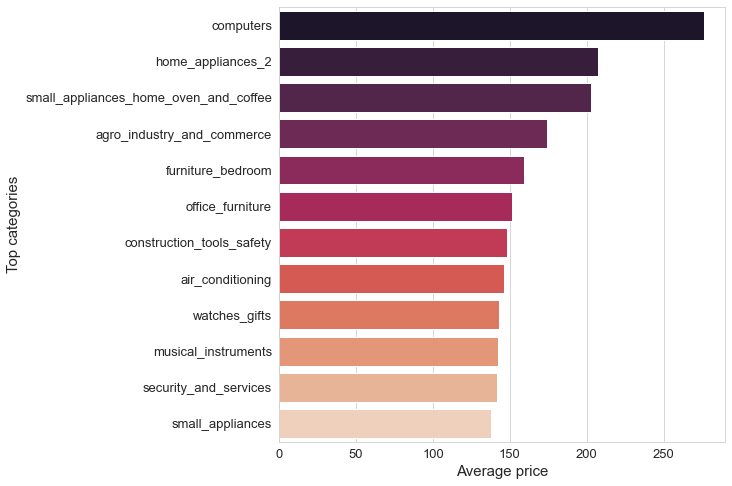

In [37]:
grp_cat_name = data.groupby('product_category_name')
grp_dict = dict(grp_cat_name.mean()['price'].sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top categories', fontsize=15)
plt.show()

When we check the pricing per product category, we can see that the average cost of a product is the highest for the items belonging to the 'computers' category. The average cost is around 1500 real. The second highest category has an average price of nearly half of the highest category.

For this plot, we considered the overall average cost of an item. This means that it is the sum of the fright charges and the original cost of the item. We can see that the ordering of the plot hasn't changed. It's only that the average cost of each category that has increased.

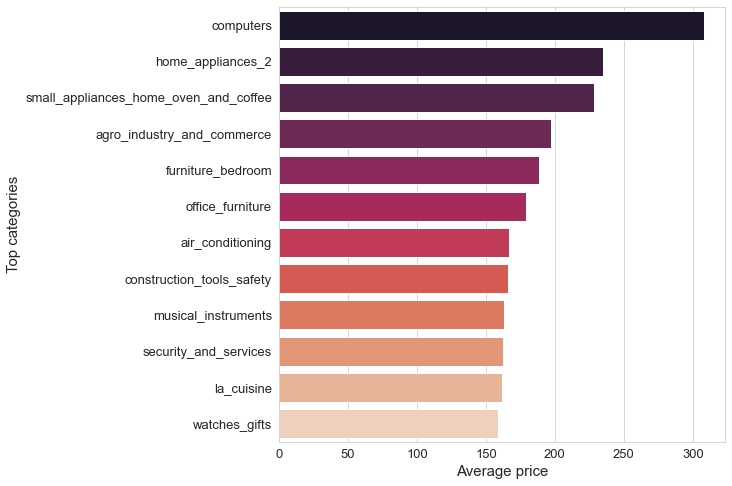

In [38]:
grp_dict = dict((grp_cat_name.mean()['price']+grp_cat_name.mean()['freight_value']).sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top categories', fontsize=15)
plt.show()

We are now finding the city which generates the highest revenue. The city named 'Pianco' generates the highest revenue.

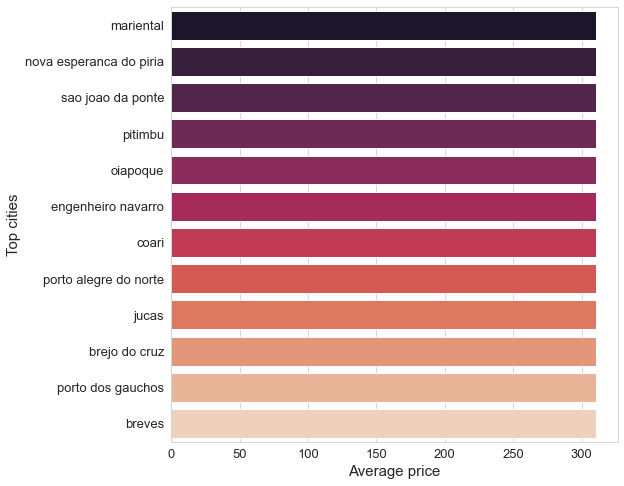

In [39]:
grp_state_name = data.groupby('customer_city')
grp_dict = dict((grp_state_name.mean()['price']+grp_state_name.mean()['freight_value']).sort_values(ascending=False)[:12])
plt.figure(figsize=(8,8))
sns.barplot(y=list(grp_dict.keys()),x=list(grp_dict.values()), palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Average price', fontsize=15)
plt.ylabel('Top cities', fontsize=15)
plt.show()

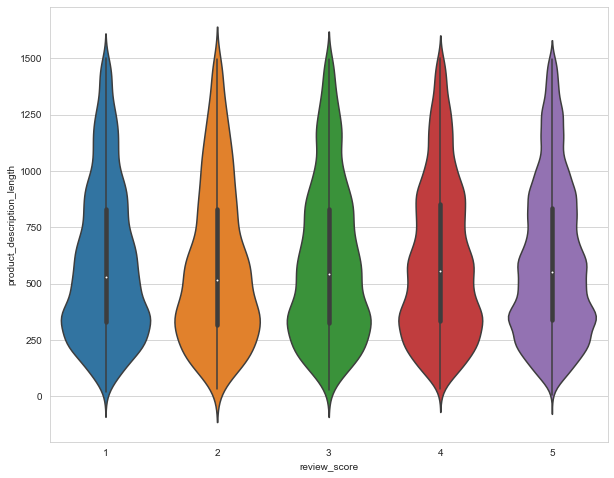

In [40]:
d = data[(data['product_name_length'] > 40) & (data['product_name_length'] < 60) & (data['product_description_length'] < 1500)]

plt.figure(figsize=(10,8))
#box plot
sns.violinplot(x='review_score',y='product_description_length', data=d)
plt.show()

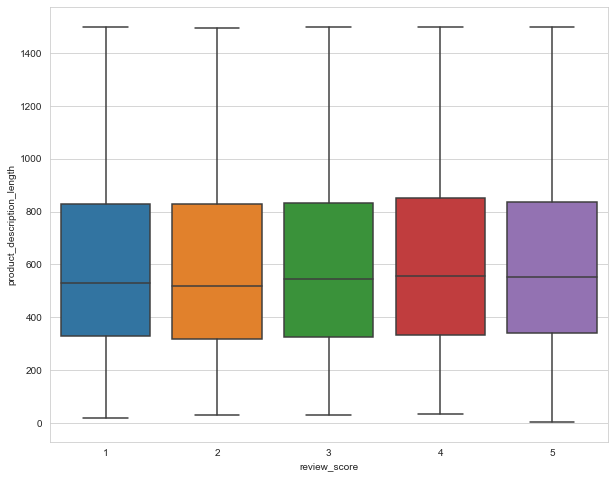

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='review_score',y='product_description_length', data=d)
plt.show()

Observations

Even after taking the most favourable data to clearly separate them out, there is still no separation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


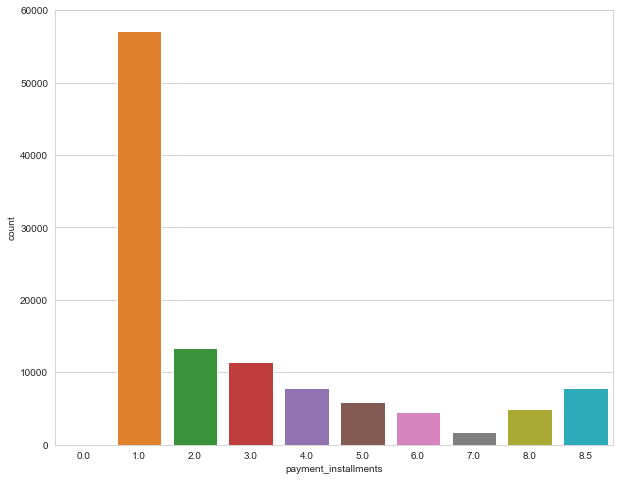

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(data.payment_installments)
plt.show()

The scatter plot between the freight cost and item cost very much descriptive. But it can be said that even if the freight cost is high, customers were satisfied when the item cost is less.

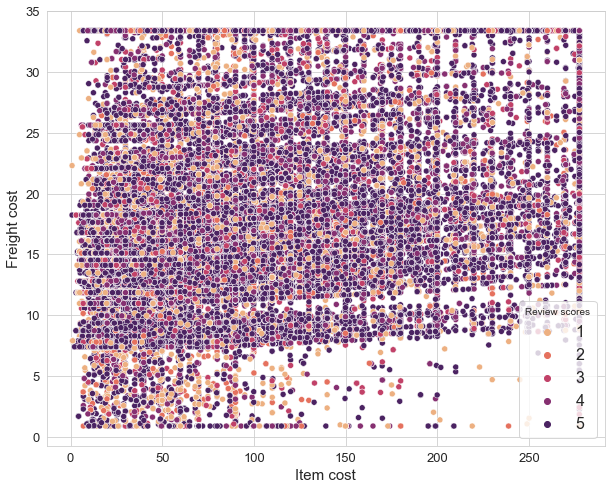

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['price'],y=data['freight_value'],hue=data['review_score'], palette='flare')
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('Freight cost', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

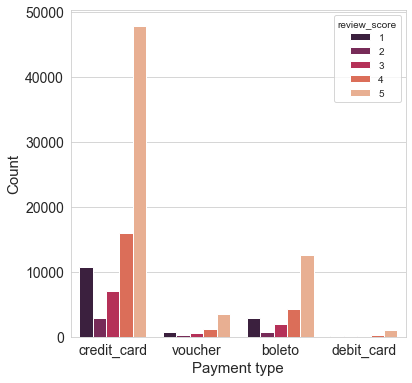

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='payment_type', hue='review_score', palette='rocket')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Payment type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Credit cards are the most popular mode of payment amongst the customers. They are much more popular than the other alternatives. The second in line, Boletos are a type of vouchers which can only be found only in Brazil. From this plot we could see that the bad reviews given to a product were most probably not because of a payment related issue.

In [45]:
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


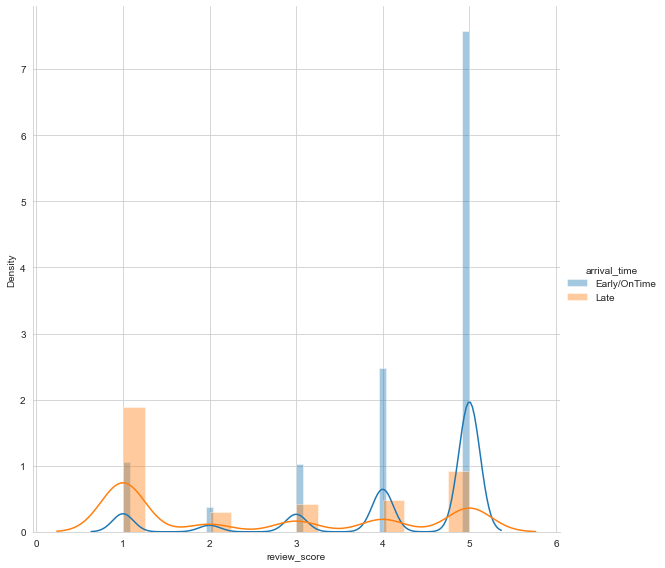

In [46]:
sns.FacetGrid(data, hue="arrival_time", height=8) \
   .map(sns.distplot, 'review_score') \
   .add_legend();
plt.show();

Observations

Clearly from the above plot the cutomers are more likely to give an 4-5 rating if the product either arrives early or arrive on time.

As delivery time impacts a lot to the customer rating we will do further analysis on the delivery time.

The below-given scatter plot takes the price on the x-axis and total time difference between delivery and purchase on the y-axis. It can be seen that as the time itaken for delivery increases, the chances to being dissatisfied with the product increases significantly. The increase in price of an item does not cause too much dissatisfaction if it is delivered on time.

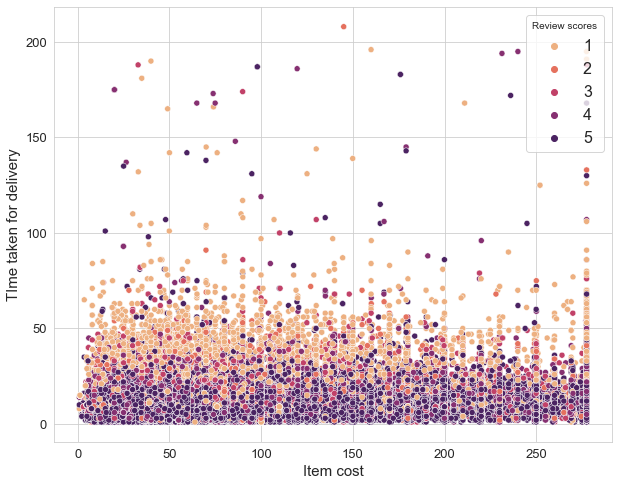

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['price'],y=data['delivery_days'],hue=data['review_score'],palette="flare")
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('TIme taken for delivery', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [48]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) | (data['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)

(604,)
Percentage of extermely late delivered packages in the dataset is: 0.527%


In [49]:
data.head()

order_purchase_timestamp order_delivered_carrier_date  \
0      2017-10-02 10:56:33          2017-10-04 19:55:00   
1      2017-10-02 10:56:33          2017-10-04 19:55:00   
2      2017-10-02 10:56:33          2017-10-04 19:55:00   
4      2018-08-08 08:38:49          2018-08-08 13:50:00   
5      2017-11-18 19:28:06          2017-11-22 13:39:59   

  order_delivered_customer_date order_estimated_delivery_date  review_score  \
0           2017-10-10 21:25:13                    2017-10-18             4   
1           2017-10-10 21:25:13                    2017-10-18             4   
2           2017-10-10 21:25:13                    2017-10-18             4   
4           2018-08-17 18:06:29                    2018-09-04             5   
5           2017-12-02 00:28:42                    2017-12-15             5   

                              review_comment_message  payment_sequential  \
0  Não testei o produto ainda, mas ele veio corre...                 1.0   
1  Não testei o produto ainda, mas ele veio corre...                 1.0   
2  Não testei o produto ainda, mas ele veio corre...                 1.0   
4                                         no_comment                 1.0   
5  O produto foi exatamente o que eu esperava e e...                 1.0   

  payment_type  payment_installments  payment_value  ...  \
0  credit_card                   1.0          18.12  ...   
1      voucher                   1.0           2.00  ...   
2      voucher                   1.0          18.59  ...   
4  credit_card                   3.0         179.12  ...   
5  credit_card                   1.0          72.20  ...   

  product_description_length  product_photos_qty zipCode_prefix_seller  \
0                      268.0                 4.0                9350.0   
1                      268.0                 4.0                9350.0   
2                      268.0                 4.0                9350.0   
4                      232.0                 1.0               14840.0   
5                      468.0                 3.0               31842.0   

  seller_state product_category_name delivery_days estimated_days  ships_in  \
0           SP            housewares           8.0           16.0       4.0   
1           SP            housewares           8.0           16.0       4.0   
2           SP            housewares           8.0           16.0       4.0   
4           SP                  auto           9.0           27.0       5.0   
5           MG              pet_shop          13.0           26.0       5.0   

   purchase_delivery_diff_per_price  arrival_time  
0                          0.266756  Early/OnTime  
1                          0.266756  Early/OnTime  
2                          0.266756  Early/OnTime  
4                          0.056285  Early/OnTime  
5                          0.288889  Early/OnTime  

[5 rows x 30 columns]

In [50]:
data.dropna(subset=['order_delivered_carrier_date','order_delivered_customer_date','delivery_days'], inplace=True)

In [51]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()
ship_days = data.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')


#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks
data['ship_impression'] = shipping_feedback

<AxesSubplot:ylabel='review_score'>

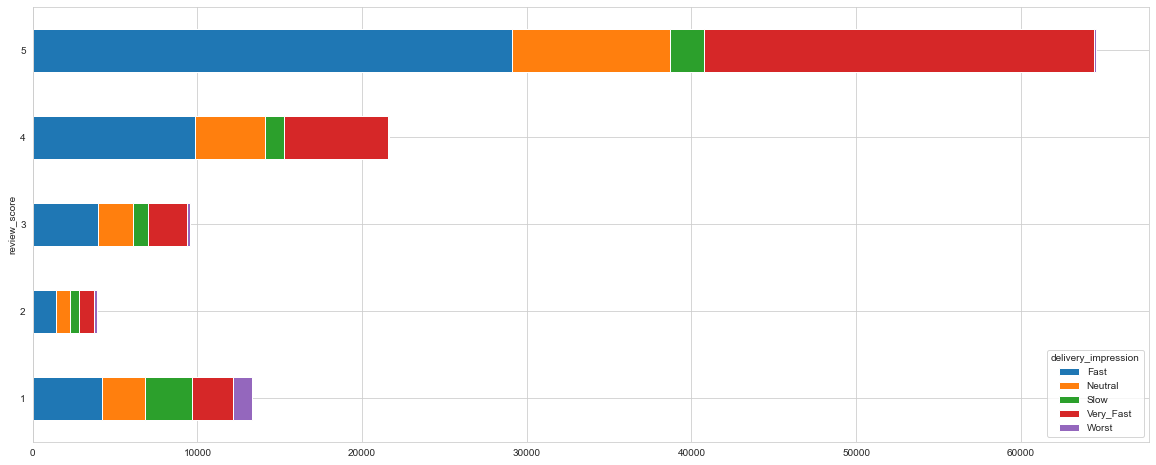

In [52]:
df_plot = data.groupby(['delivery_impression', 'review_score']).size().reset_index().pivot(columns='delivery_impression', index='review_score', values=0)
df_plot.plot(kind='barh',stacked=True,figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


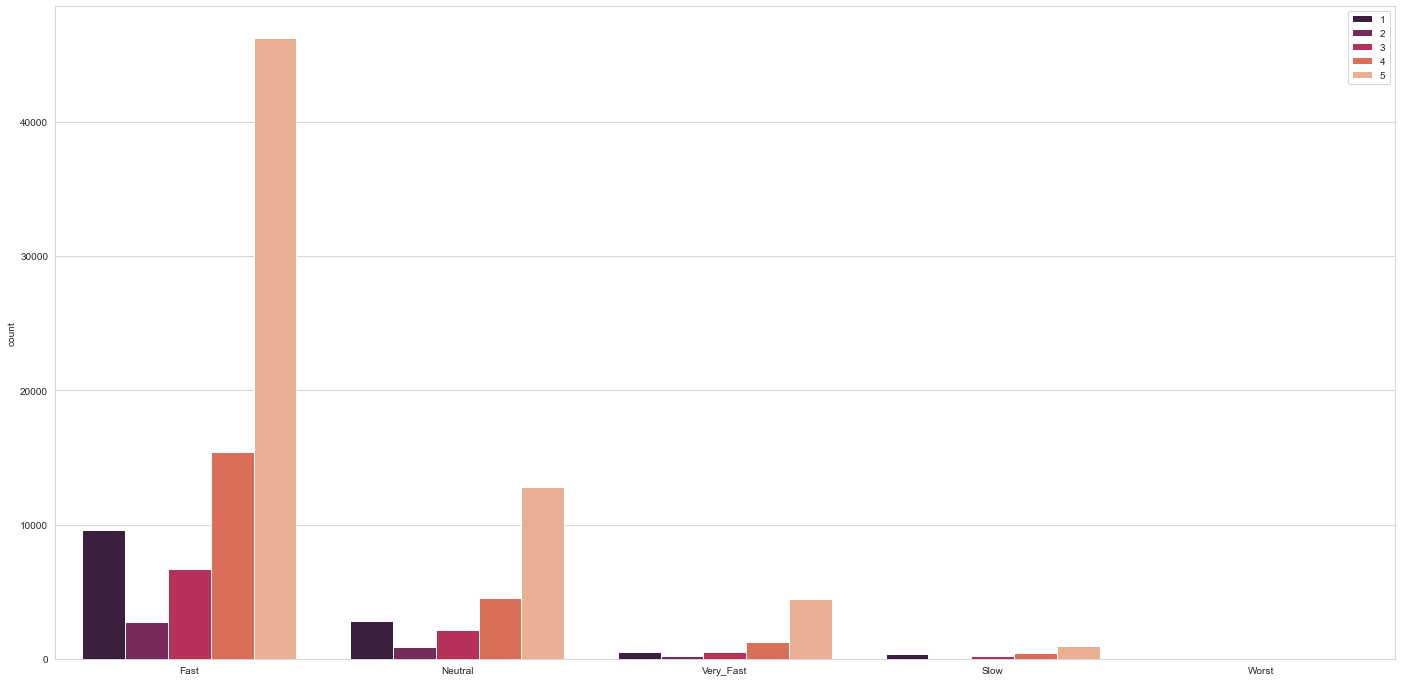

In [53]:
#Estimated Days histogram with review rating as hue
est_days = data.ship_impression.values.tolist()
review_score = data.review_score.values
fig = plt.figure(figsize=(24,12))
sns.countplot(est_days,hue=review_score,palette='rocket')
plt.show()

Observations

Majority of orders are delivered in the Fast range i.e (8-15) within 2 weeks .

However, next to it Very Fast range of delivery days which is (0-7) days.

Important observation here is customers are more likely to get things delivered in top 3 categories which are Fast,Very Fast and Neutral. From which majority of elment have rated the product to be 5 , some 4 while very few have rated less than in each of the 3 cases.

Delivery days is thus an important feature which can be added.

Moreover we have another feature which is estmated delivery date, so we also add a new feature to the dataset which is estimated delivery days. This can be some what useful, because this date is shown in advance to the user.

In the estimated delivery days feature though, company says out the maximum days it can take to reach.

Upon observing the histograms for the estimated_days with rating as hue, similar trend of maximum rating for all the Fast Neutral and slow category. However, very fast category becomes one of the least.

Feature Engineering for ID based features

Customer_ID

In [54]:
from collections import Counter
#finding all those customers who have made multiple product purchases
order_counts = [k for k,v in Counter(data.customer_unique_id).items() if v > 1]
existing_cust = []
for i in data.customer_unique_id.values:
    if i in order_counts:
        existing_cust.append(1)
    else:
        existing_cust.append(0)
len(existing_cust)

112910

Seller_ID

In [55]:
print('Number of orders that are made using exisiting customer/Multiple orders are ',existing_cust.count(1))

Number of orders that are made using exisiting customer/Multiple orders are  35274


In [56]:
#seller popularity based on number of orders for each seller
max_value_count = data.seller_id.value_counts().max()
seller = data.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in data.seller_id.values:
    seller_popularity.append(seller[_id])
data['seller_popularity'] = seller_popularity
data.shape

(112910, 34)

Observations

As in most of the cases customer and seller zip_code are not matching so we are dropping the featrure because it will increase dimenssion by 34k.

Question No.3.A:

In [57]:
#dropping all id based features
data.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

#adding exisitng customer and seller_ID feature

data['existing_cust'] = existing_cust
data.shape

(112910, 30)

Question No.3.C:

In [58]:
data['review_score'] = data['review_score'].apply(lambda x: 1 if x > 3 else 0)
data['review_score'] = 'Score_' + data['review_score'].astype(str)
data.shape

(112910, 30)

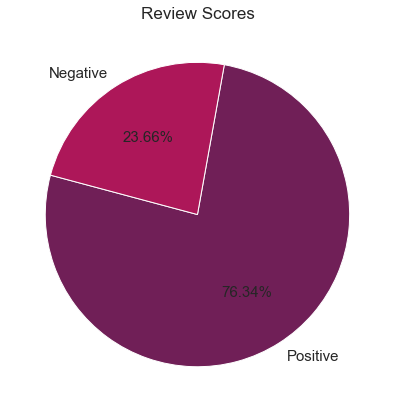

In [59]:
plt.figure(figsize=(7,7))
data['review_score'].map({'Score_0':'Negative','Score_1':'Positive'}).value_counts().plot.pie(autopct='%.2f%%', 
                                            textprops={'fontsize':15}, startangle=165, colors=['#701f57','#ad1759','#f6b48f'])
plt.title('Review Scores', fontsize=17)
plt.ylabel('')
plt.show()

On plotting the pie chart showing the review scores, we see that the positive class occupies 76.35% of the entire dataset; whereas the negative class only occupies 23.66%. This means that the entire dataset is imbalanced.

In [60]:
#removing the datetime features as we dont need them now
data.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','review_comment_message','shipping_limit_date'],axis=1,inplace=True)
data.to_csv('preprocessed_data.csv',index=False)

In [61]:
print(data.shape)
print('Final set of features are : ')
data.columns

(112910, 24)
Final set of features are : 


Index(['review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_city',
       'customer_state', 'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'seller_state',
       'product_category_name', 'delivery_days', 'estimated_days', 'ships_in',
       'purchase_delivery_diff_per_price', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust'],
      dtype='object')

Summary

Data is heavily imbalanced having mostly positive review_score, this can impact the model so we have to perform necessiry data modelling to deal with this.

From above analysis it is quite conclusive that the review_score highly depends on the delivery time, however some of the rest features are also useful but we need actual model to determine feature importances.

Other features like price , product name length, description length can be very useful feature, but as the data is immbalace it can not be simple EDA.

We have added few more features to the dataset that coresponds to the delivery and shipment.

We will be strict about sentiments in this analysis and consider even neutral or (3 rating) to be negetive because for product recommendation the stricter the benchmark is the better.

Feature engineering done here might not be suffiicient to obtain the best accuracy so we might need to perform some more feature engineering.

In [62]:

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,auc
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [63]:
data.rename(columns = {'review_score':'Score'},inplace=True)

Qutestion No.3.D & E:

In [64]:
X = data.drop('Score',axis=1)
Y = data.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(79037, 23) (33873, 23) (79037,) (33873,)


Normalising all the numerical features

In [65]:
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))

#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

Normalising Categorical features

Question No.3.B:

Creating dummy variables using onehot encoder

In [66]:
#initialising oneHotEncoder

onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

Stacking the data

In [67]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

(79037, 153) (33873, 153)


In [68]:
import scipy
scipy.sparse.save_npz('X_train_vec.npz', X_train_vec)
scipy.sparse.save_npz('X_test_vec.npz', X_test_vec)

In [69]:
pd.DataFrame(y_train).to_csv('train_labels.csv',index=False)
pd.DataFrame(y_test).to_csv('test_labels.csv',index=False)
tomato = scipy.sparse.load_npz('X_train_vec.npz')
tomato.shape

(79037, 153)

Question No.3.F:

Naive Bayes

Hyper parameter Tuning

In [70]:
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

#for the bow based model
NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [71]:
NB.best_params_

{'alpha': 0.0001}

Fitting the Model

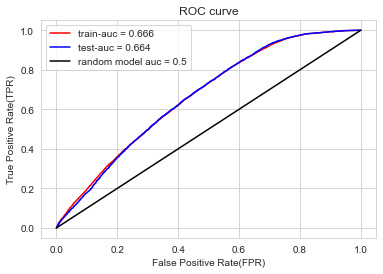

Best AUC for the model is 0.664 


In [72]:
clf = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1], pos_label='Score_1')
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1], pos_label='Score_1')

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

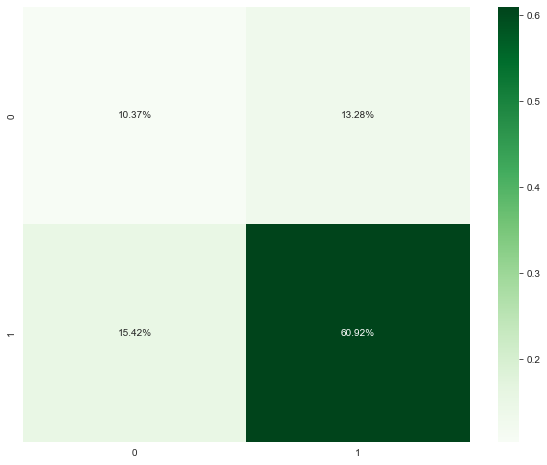

In [73]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [74]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train, pos_label='Score_1'),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test, pos_label='Score_1'),4))

Train F1_score for this model is :  0.8093
Test F1_score for this model is :  0.8088


In [75]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7129
Test Accuracy score for this model :  0.7125


Observations

Naive bayes performed pretty decent in terms of minimal overfitting in train and test performances.
Both train and test f1 score was 0.81 and accuracy 71%.
But the confusion matrix says it has misclassified many points as False Positives.
AUC score for test data was 0.664.

Logistic Regression

Hyper parameter Tuning

In [76]:
#we have used max_iter 1000 as it was causing exception while fitting
Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

#for the bow based model
LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [77]:
LR.best_params_

{'C': 0.1}

NOTE

For performance measurement we will not use accuracy as a metric as the data set is highly imbalanced.
We will use AUC score and f1 score as performance metric.

In [78]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, max_iter=1000)

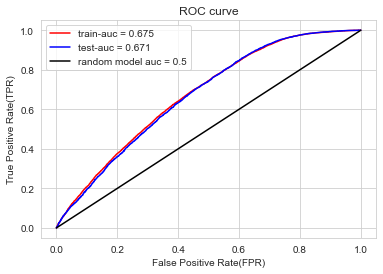

Best AUC for the model is 0.671 


In [79]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1], pos_label='Score_1')
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1], pos_label='Score_1')

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

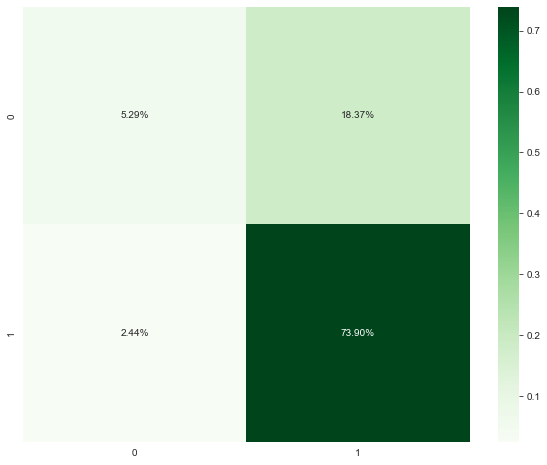

In [80]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [81]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train, pos_label='Score_1'),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test, pos_label='Score_1'),4))

Train F1_score for this model is :  0.8766
Test F1_score for this model is :  0.8763


In [82]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7919
Test Accuracy score for this model :  0.7915


Observations

Logistic regression performs considerably better than Naive bayes in terms of f1 score, however AUC score being almost the same.
Misclassification of False positives reduced which resulted in the increase of f1 score of 88%.
Accuracy was 79% for both train and test which shows the model overfits a little.

Decision Tree

HyperParmater tuning

In [83]:
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10,15,20], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 100, 300, 500, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [84]:
#best params
DT.best_params_

{'max_depth': 20, 'min_samples_split': 300}

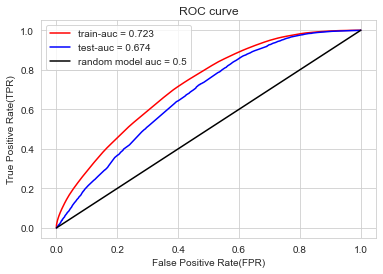

Best AUC for the model is 0.674 


In [85]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1], pos_label='Score_1')
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1], pos_label='Score_1')

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

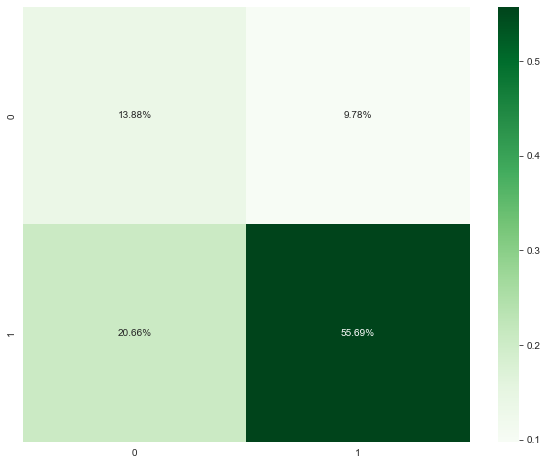

In [86]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [87]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train, pos_label='Score_1'),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test, pos_label='Score_1'),4))

Train F1_score for this model is :  0.7854
Test F1_score for this model is :  0.7697


In [88]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.6956
Test Accuracy score for this model :  0.6733


Observations

Decision Tree does nothing better interms of both f1 score , auc score and accuracy comes out to be 0.78 and 69%.
It misclassfied False Positives to a lot.
Model doesn't overfit but doesn't perform better either.

Random Forest

Hyperparameter Tuning

In [89]:
#param grid
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [90]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

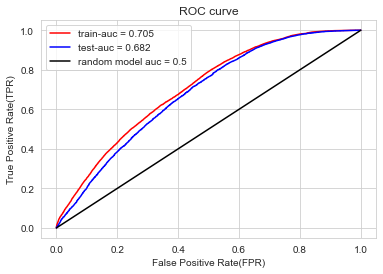

Best AUC for the model is 0.682 


In [91]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1], pos_label='Score_1')
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1], pos_label='Score_1')

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

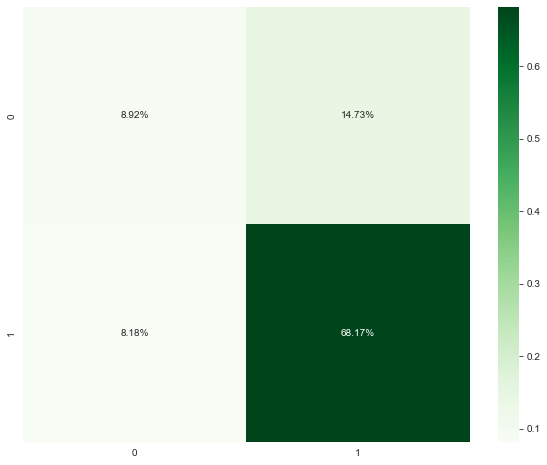

In [92]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [93]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train, pos_label='Score_1'),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test, pos_label='Score_1'),4))

Train F1_score for this model is :  0.8561
Test F1_score for this model is :  0.8524


In [94]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7709
Test Accuracy score for this model :  0.7653


Observations

Random forest performs better than logistic regression in terms of f1 score and accuracy.
It gives an f1 score of 85.5% and doesn't seem to overfit.
Misclassification rate is still not that great.
AUC is score is 0.682
Accuracy score is 77%.

GBDT

Hyper parameter tuning

In [95]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(RFclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_split': [5, 10, 30, 50]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [96]:
#best parameters
clf.best_params_

{'max_depth': 8, 'min_samples_split': 5}

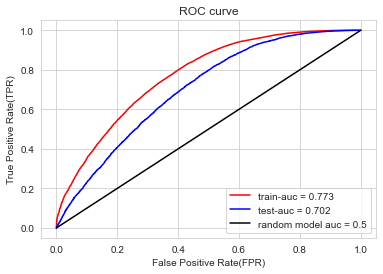

Best AUC for the model is 0.702 


In [97]:
import pickle
#Model
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1], pos_label='Score_1')
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1], pos_label='Score_1')

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

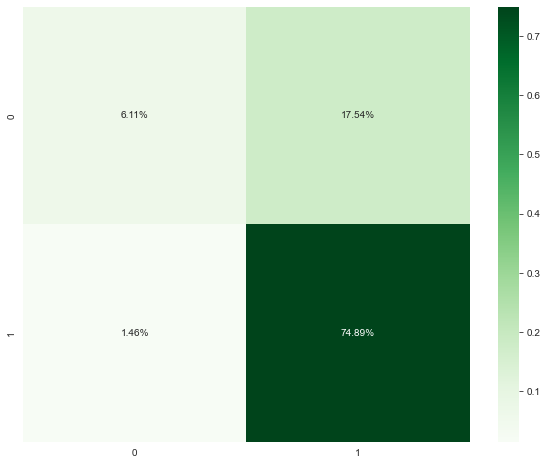

In [98]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [99]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train, pos_label='Score_1'),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test, pos_label='Score_1'),4))

Train F1_score for this model is :  0.8874
Test F1_score for this model is :  0.8794


In [100]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.81
Test Accuracy score for this model :  0.7964


Observations

Gradient Boosted classifier results the best f1 score of 0.89 and auc score of 0.702.
Misclassification of False Positives and True negetives is also reduced to 11% also true positive rate is 83%.
Accuracy score is 80% for test and 81% for train data.
Model doesnot overfit at all comapred to rest of the models

Summary


GBDT performs better in comparision to rest of the model in terms of all the performance metric.

Logistic regression performs fairly similar to GBDT, but GBDT is more robust to outliers.

Rating prediction is not fairly dependent directly on most of the features, so the performance is not at its peak.

We have used f1 score as our primary performance metric.